In [13]:
import h5py
import math
import numpy as np
import matplotlib.pyplot as plt

from vlgpax.kernel import RBF
from vlgpax import Session, vi
from config import get_cfg_defaults
# pip install git+https://github.com/yuanz271/vlgpax.git

cfg = get_cfg_defaults()
data = h5py.File('data/poisson_obs.h5')

Y = np.array(data['Y'])
X = np.array(data['X'])
C = np.array(data['C'])
b = np.array(data['bias'])

n_trials = 5
bin_size_ms = 5
n_latents = X.shape[2]
time_delta = bin_size_ms * 1e-3

n_latents = X.shape[2]
n_neurons = Y.shape[2]
n_time_bins = Y.shape[1]

Y = Y[:n_trials]
X = X[:n_trials]

In [14]:
random_seed = 1234
np.random.seed(random_seed)

# Create an inference session
print(Y.shape)
session = Session(time_delta)

# Session is the top level container of data. Two arguments, binsize and unit of time, are required at construction.
for i, y in enumerate(Y):
    print(y.shape)
    session.add_trial(i + 1, y = y)  # Add trials to the session.

# Build the model
kernel = RBF(scale = 1., lengthscale = 25 * time_delta)  # RBF kernel
session, params = vi.fit(session, n_factors=2, kernel=kernel, seed=random_seed, max_iter=50)

(5, 500, 250)
(500, 250)
(500, 250)
(500, 250)
(500, 250)
(500, 250)
Initializing
Initialized
EM Iteration 1, 	Loss = 118.1505, 	M step: 0.49s, 	E step: 0.78s
EM Iteration 2, 	Loss = 117.5581, 	M step: 0.20s, 	E step: 0.30s
EM Iteration 3, 	Loss = 117.5538, 	M step: 0.15s, 	E step: 0.32s
EM Iteration 4, 	Loss = 117.5500, 	M step: 0.15s, 	E step: 0.40s
EM Iteration 5, 	Loss = 117.5464, 	M step: 0.17s, 	E step: 0.42s
EM Iteration 6, 	Loss = 117.5430, 	M step: 0.15s, 	E step: 0.43s
EM Iteration 7, 	Loss = 117.5399, 	M step: 0.15s, 	E step: 0.42s
EM Iteration 8, 	Loss = 117.5370, 	M step: 0.15s, 	E step: 0.41s
EM Iteration 9, 	Loss = 117.5342, 	M step: 0.15s, 	E step: 0.38s
EM Iteration 10, 	Loss = 117.5316, 	M step: 0.15s, 	E step: 0.39s
EM Iteration 11, 	Loss = 117.5291, 	M step: 0.15s, 	E step: 0.42s
EM Iteration 12, 	Loss = 117.5269, 	M step: 0.15s, 	E step: 0.39s
EM Iteration 13, 	Loss = 117.5247, 	M step: 0.15s, 	E step: 0.41s
EM Iteration 14, 	Loss = 117.5227, 	M step: 0.15s, 	E ste

X_hat shape: (2500, 2)


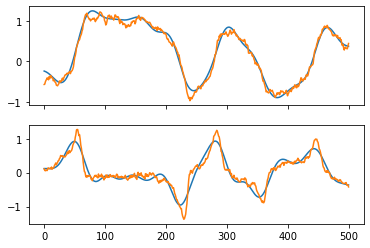

In [15]:

# regress to account for invariance
X_hat = session.z
S = np.linalg.pinv(X_hat) @ X.reshape(n_trials * n_time_bins, n_latents)
X_hat_tilde = X_hat @ S
X_hat_tilde = X_hat_tilde.reshape(n_trials, n_time_bins, n_latents)

# Plot
fig, axs = plt.subplots(2, 1, sharex='all')
print(f'X_hat shape: {X_hat.shape}')
axs[0].plot(X_hat_tilde[0, :, 0])
axs[0].plot(X[0, :, 0])
axs[1].plot(X_hat_tilde[0, :, 1])
axs[1].plot(X[0, :, 1])
plt.show()